Image: ../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/BM3D_Denoised_Gaussian/denoised_snr0_condition1.tiff
SNR: 1.4602201006241726, CNR: 0.2075024277510777
Image: ../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/BM4D_Denoised_Gaussian/denoised_snr0_evoltime1.tiff
SNR: 1.5864669933721702, CNR: 0.16082040705667364
Image: ../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/TV_Denoised_Gaussian/denoised_snr0_evoltime1.tiff
SNR: 1.7978512942230498, CNR: 0.2913097778421595
Image: ../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/NLM_Denoised_Gaussian/denoised_snr0_condition1.png
SNR: 1.7827084074517168, CNR: 0.13710907093322644


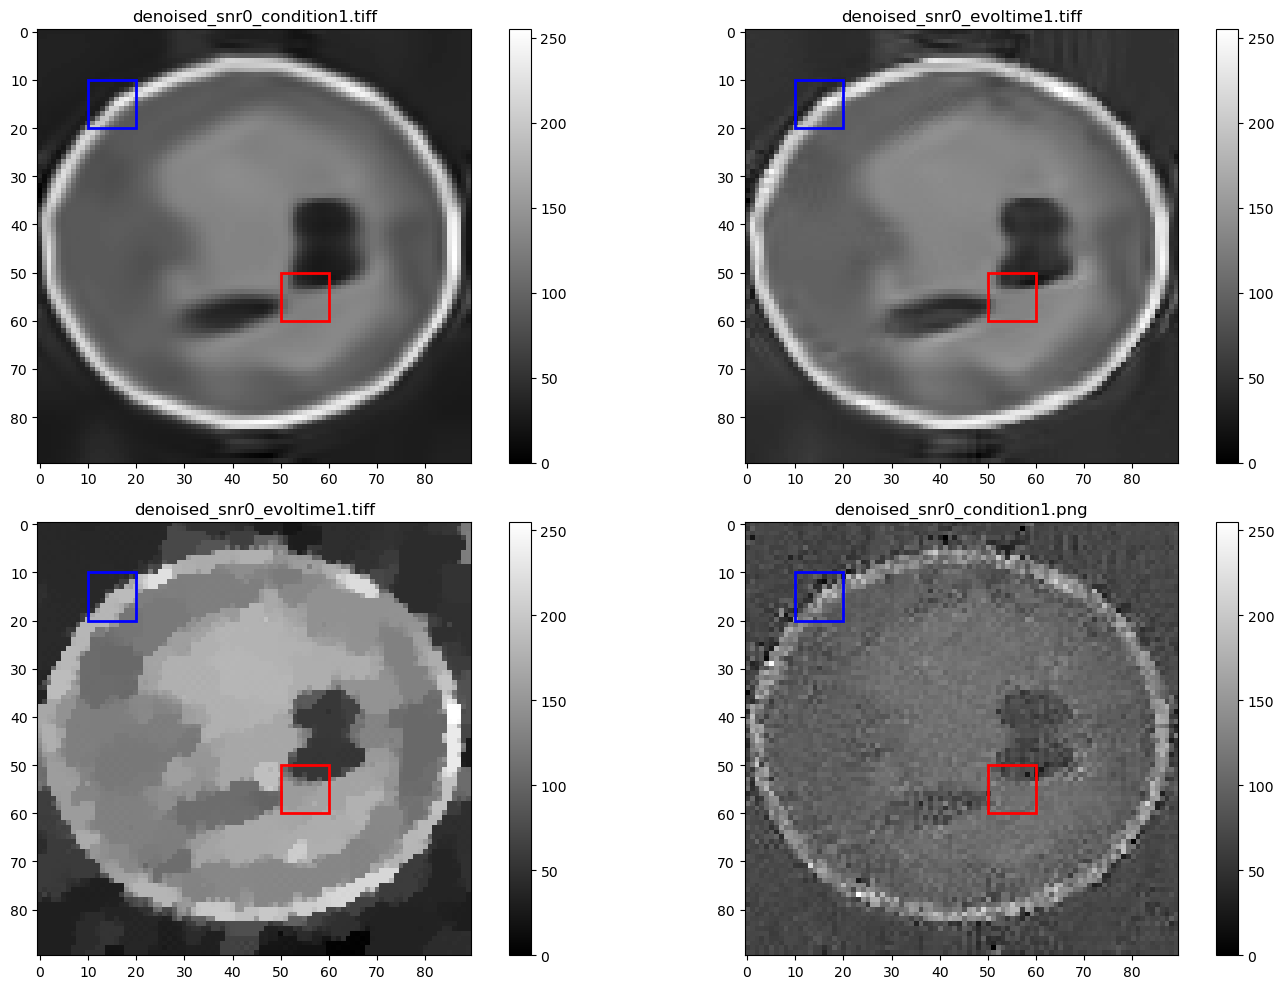

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords=None):
    """
    Calculate SNR and CNR for a given image.
    
    :param image_path: Path to the image file.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    :param roi2_coords: Coordinates for the second ROI for CNR calculation (optional).
    :return: SNR, CNR (CNR is None if roi2_coords is not provided).
    """
    image = imread(image_path)
    x, y, width, height = roi_coords
    roi_signal = image[y:y+height, x:x+width, :]
    mean_signal = np.mean(roi_signal)
    
    x, y, width, height = noise_coords
    roi_noise = image[y:y+height, x:x+width, :]
    std_noise = np.std(roi_noise)
    
    snr = mean_signal / std_noise if std_noise != 0 else np.inf
    
    cnr = None
    if roi2_coords:
        x, y, width, height = roi2_coords
        roi2_signal = image[y:y+height, x:x+width, :]
        mean_signal2 = np.mean(roi2_signal)
        cnr = (mean_signal - mean_signal2) / std_noise
    
    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords):
    """
    Visualize the ROIs on all images in a single figure.
    
    :param image_paths: List of paths to the image files.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    """
    num_images = len(image_paths)
    # Calculate the grid size for plotting
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows
    
    plt.figure(figsize=(15, nrows * 5))
    
    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)
        plt.imshow(image[:, :, 0], cmap='gray')  # Assuming we visualize the first channel
        plt.colorbar()
        
        # Draw the signal ROI
        x, y, width, height = roi_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='red', facecolor='none', linewidth=2))
        
        # Draw the noise ROI
        x, y, width, height = noise_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='blue', facecolor='none', linewidth=2))
        
        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

# Example usage
image_paths = [
    '../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/BM3D_Denoised_Gaussian/denoised_snr0_condition1.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/BM4D_Denoised_Gaussian/denoised_snr0_evoltime1.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/TV_Denoised_Gaussian/denoised_snr0_evoltime1.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/NLM_Denoised_Gaussian/denoised_snr0_condition1.png']
roi_coords = (50, 50, 10, 10)
noise_coords = (10, 10, 10, 10)
roi2_coords = (70, 70, 10, 10)  # Example secondary ROI for CNR calculation

for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")
    
    # Assuming image_paths, roi_coords, and noise_coords are already defined
visualize_all_rois(image_paths, roi_coords, noise_coords)



Image: ../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/BM3D_Denoised_Gaussian/denoised_snr5_condition1.tiff
SNR: 1.413627732497595, CNR: 0.20332949018753108
Image: ../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/BM4D_Denoised_Gaussian/denoised_snr5_evoltime1.tiff
SNR: 1.401412857915586, CNR: 0.15851198210913078
Image: ../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/TV_Denoised_Gaussian/denoised_snr5_evoltime1.tiff
SNR: 1.7544522943059824, CNR: 0.34075580856232196
Image: ../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/NLM_Denoised_Gaussian/denoised_snr5_condition1.png
SNR: 1.812031691035374, CNR: 0.1655113482739526


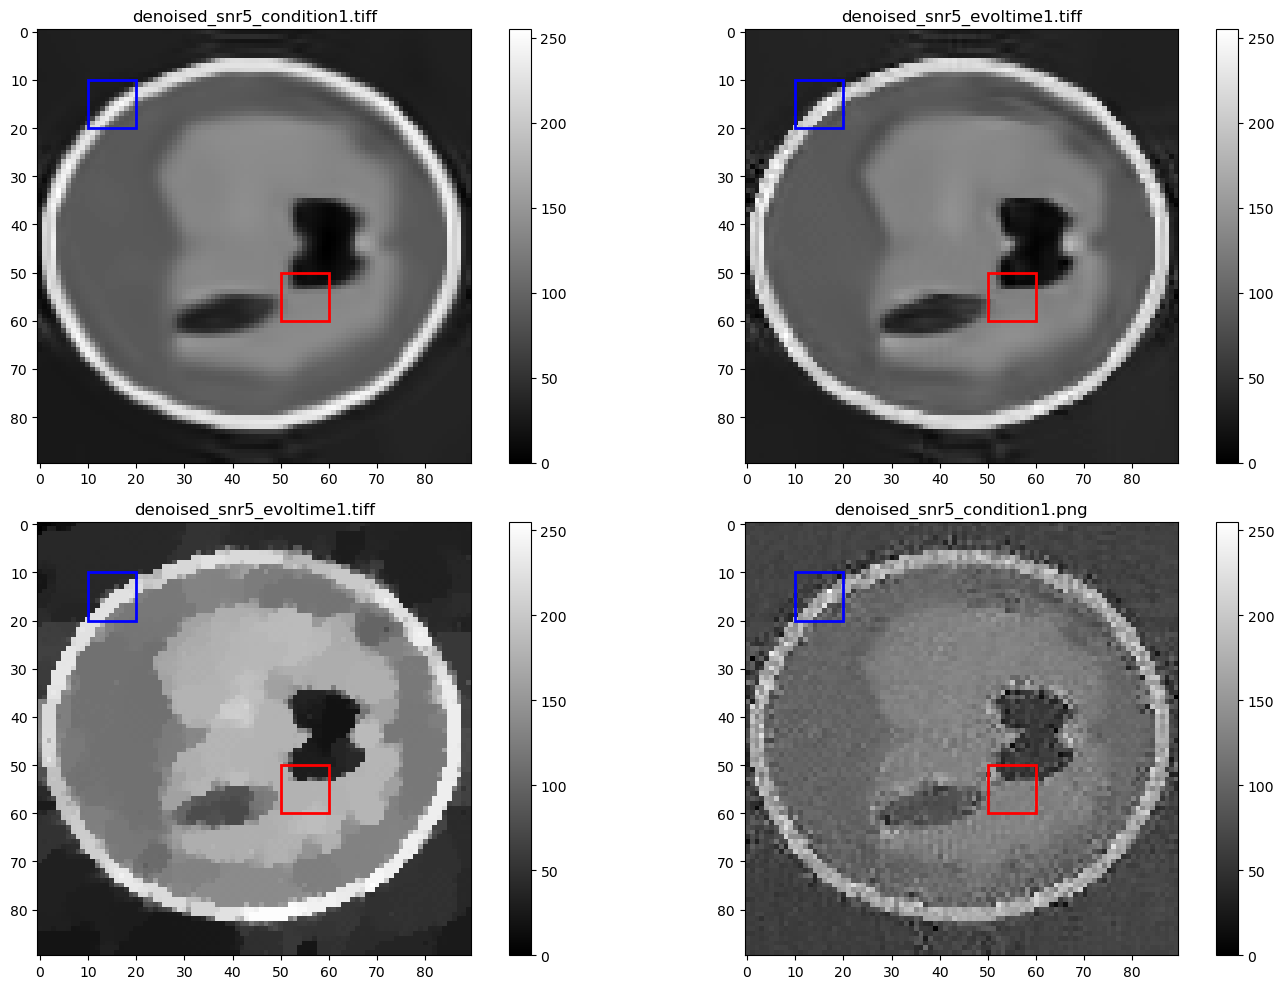

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords=None):
    """
    Calculate SNR and CNR for a given image.
    
    :param image_path: Path to the image file.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    :param roi2_coords: Coordinates for the second ROI for CNR calculation (optional).
    :return: SNR, CNR (CNR is None if roi2_coords is not provided).
    """
    image = imread(image_path)
    x, y, width, height = roi_coords
    roi_signal = image[y:y+height, x:x+width, :]
    mean_signal = np.mean(roi_signal)
    
    x, y, width, height = noise_coords
    roi_noise = image[y:y+height, x:x+width, :]
    std_noise = np.std(roi_noise)
    
    snr = mean_signal / std_noise if std_noise != 0 else np.inf
    
    cnr = None
    if roi2_coords:
        x, y, width, height = roi2_coords
        roi2_signal = image[y:y+height, x:x+width, :]
        mean_signal2 = np.mean(roi2_signal)
        cnr = (mean_signal - mean_signal2) / std_noise
    
    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords):
    """
    Visualize the ROIs on all images in a single figure.
    
    :param image_paths: List of paths to the image files.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    """
    num_images = len(image_paths)
    # Calculate the grid size for plotting
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows
    
    plt.figure(figsize=(15, nrows * 5))
    
    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)
        plt.imshow(image[:, :, 0], cmap='gray')  # Assuming we visualize the first channel
        plt.colorbar()
        
        # Draw the signal ROI
        x, y, width, height = roi_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='red', facecolor='none', linewidth=2))
        
        # Draw the noise ROI
        x, y, width, height = noise_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='blue', facecolor='none', linewidth=2))
        
        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

# Example usage
image_paths = [
    '../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/BM3D_Denoised_Gaussian/denoised_snr5_condition1.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/BM4D_Denoised_Gaussian/denoised_snr5_evoltime1.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/TV_Denoised_Gaussian/denoised_snr5_evoltime1.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/NLM_Denoised_Gaussian/denoised_snr5_condition1.png']
roi_coords = (50, 50, 10, 10)
noise_coords = (10, 10, 10, 10)
roi2_coords = (70, 70, 10, 10)  # Example secondary ROI for CNR calculation

for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")
    
    # Assuming image_paths, roi_coords, and noise_coords are already defined
visualize_all_rois(image_paths, roi_coords, noise_coords)

Image: ../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/BM3D_Denoised_Gaussian/denoised_snr10_condition1.tiff
SNR: 1.499252601744567, CNR: 0.18119436677705958
Image: ../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/BM4D_Denoised_Gaussian/denoised_snr10_evoltime1.tiff
SNR: 1.469153956133183, CNR: 0.16283255656817386
Image: ../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/TV_Denoised_Gaussian/denoised_snr10_evoltime1.tiff
SNR: 1.3881356885213818, CNR: 0.27446669722952505
Image: ../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/NLM_Denoised_Gaussian/denoised_snr10_condition1.png
SNR: 2.0406570455960558, CNR: 0.20668786402862527


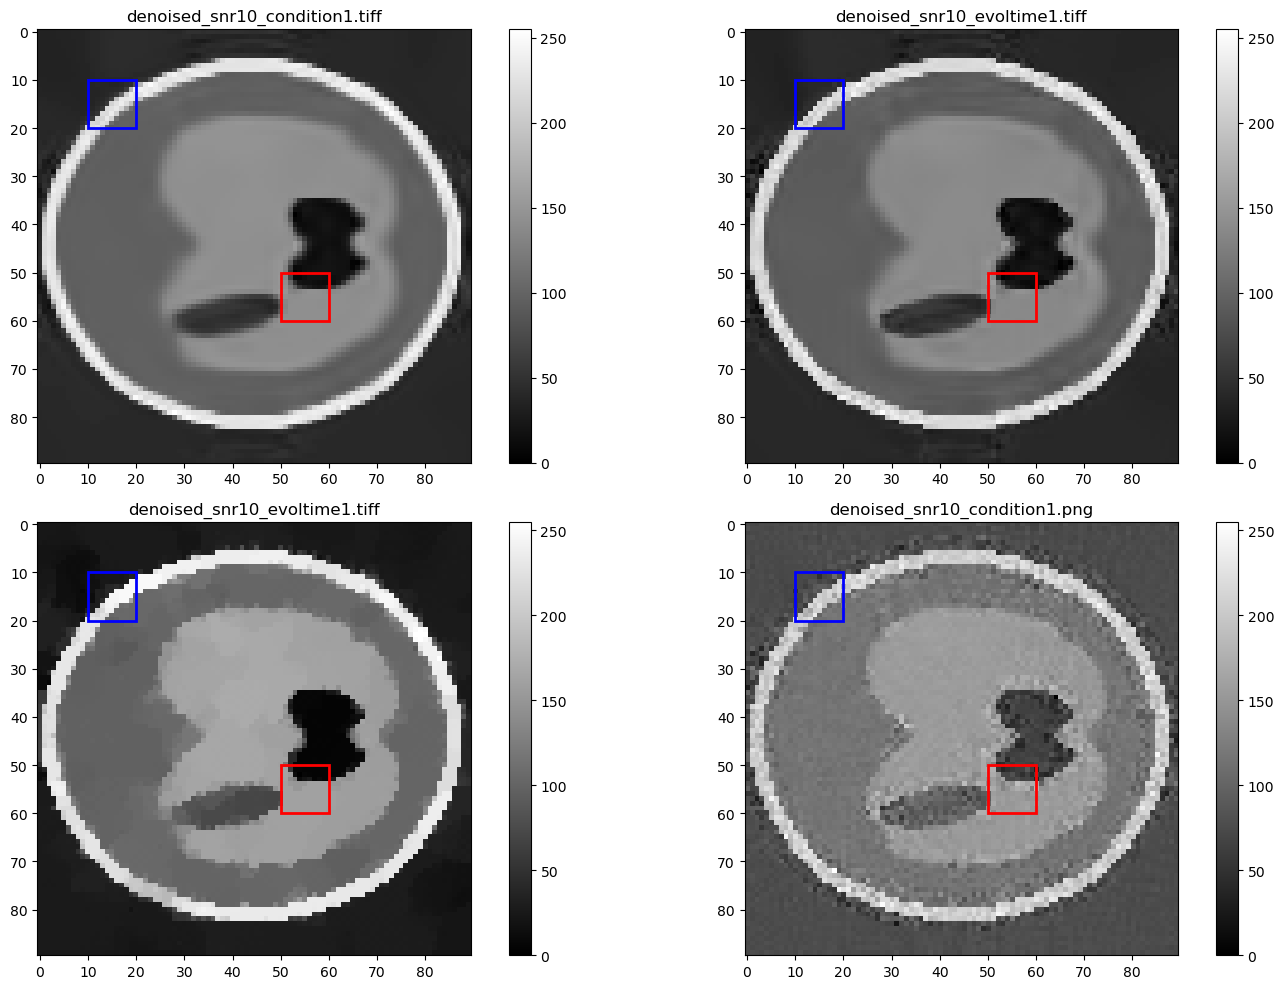

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords=None):
    """
    Calculate SNR and CNR for a given image.
    
    :param image_path: Path to the image file.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    :param roi2_coords: Coordinates for the second ROI for CNR calculation (optional).
    :return: SNR, CNR (CNR is None if roi2_coords is not provided).
    """
    image = imread(image_path)
    x, y, width, height = roi_coords
    roi_signal = image[y:y+height, x:x+width, :]
    mean_signal = np.mean(roi_signal)
    
    x, y, width, height = noise_coords
    roi_noise = image[y:y+height, x:x+width, :]
    std_noise = np.std(roi_noise)
    
    snr = mean_signal / std_noise if std_noise != 0 else np.inf
    
    cnr = None
    if roi2_coords:
        x, y, width, height = roi2_coords
        roi2_signal = image[y:y+height, x:x+width, :]
        mean_signal2 = np.mean(roi2_signal)
        cnr = (mean_signal - mean_signal2) / std_noise
    
    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords):
    """
    Visualize the ROIs on all images in a single figure.
    
    :param image_paths: List of paths to the image files.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    """
    num_images = len(image_paths)
    # Calculate the grid size for plotting
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows
    
    plt.figure(figsize=(15, nrows * 5))
    
    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)
        plt.imshow(image[:, :, 0], cmap='gray')  # Assuming we visualize the first channel
        plt.colorbar()
        
        # Draw the signal ROI
        x, y, width, height = roi_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='red', facecolor='none', linewidth=2))
        
        # Draw the noise ROI
        x, y, width, height = noise_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='blue', facecolor='none', linewidth=2))
        
        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

# Example usage
image_paths = [
    '../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/BM3D_Denoised_Gaussian/denoised_snr10_condition1.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/BM4D_Denoised_Gaussian/denoised_snr10_evoltime1.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/TV_Denoised_Gaussian/denoised_snr10_evoltime1.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/NLM_Denoised_Gaussian/denoised_snr10_condition1.png']
roi_coords = (50, 50, 10, 10)
noise_coords = (10, 10, 10, 10)
roi2_coords = (70, 70, 10, 10)  # Example secondary ROI for CNR calculation

for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")
    
    # Assuming image_paths, roi_coords, and noise_coords are already defined
visualize_all_rois(image_paths, roi_coords, noise_coords)

Image: ../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/BM3D_Denoised_Rician/denoised_snr0_condition1.tiff
SNR: 1.5644424756548416, CNR: 0.18196245496076244
Image: ../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/BM4D_Denoised_Rician/denoised_snr0_evoltime1.tiff
SNR: 1.5111181465267396, CNR: 0.14311727530888876
Image: ../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/TV_Denoised_Rician/denoised_snr0_evoltime1.tiff
SNR: 1.697976411094397, CNR: 0.29886112548271404
Image: ../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/NLM_Denoised_Rician/denoised_snr0_condition1.tiff
SNR: 2.224304716972144, CNR: 0.1375444100301473


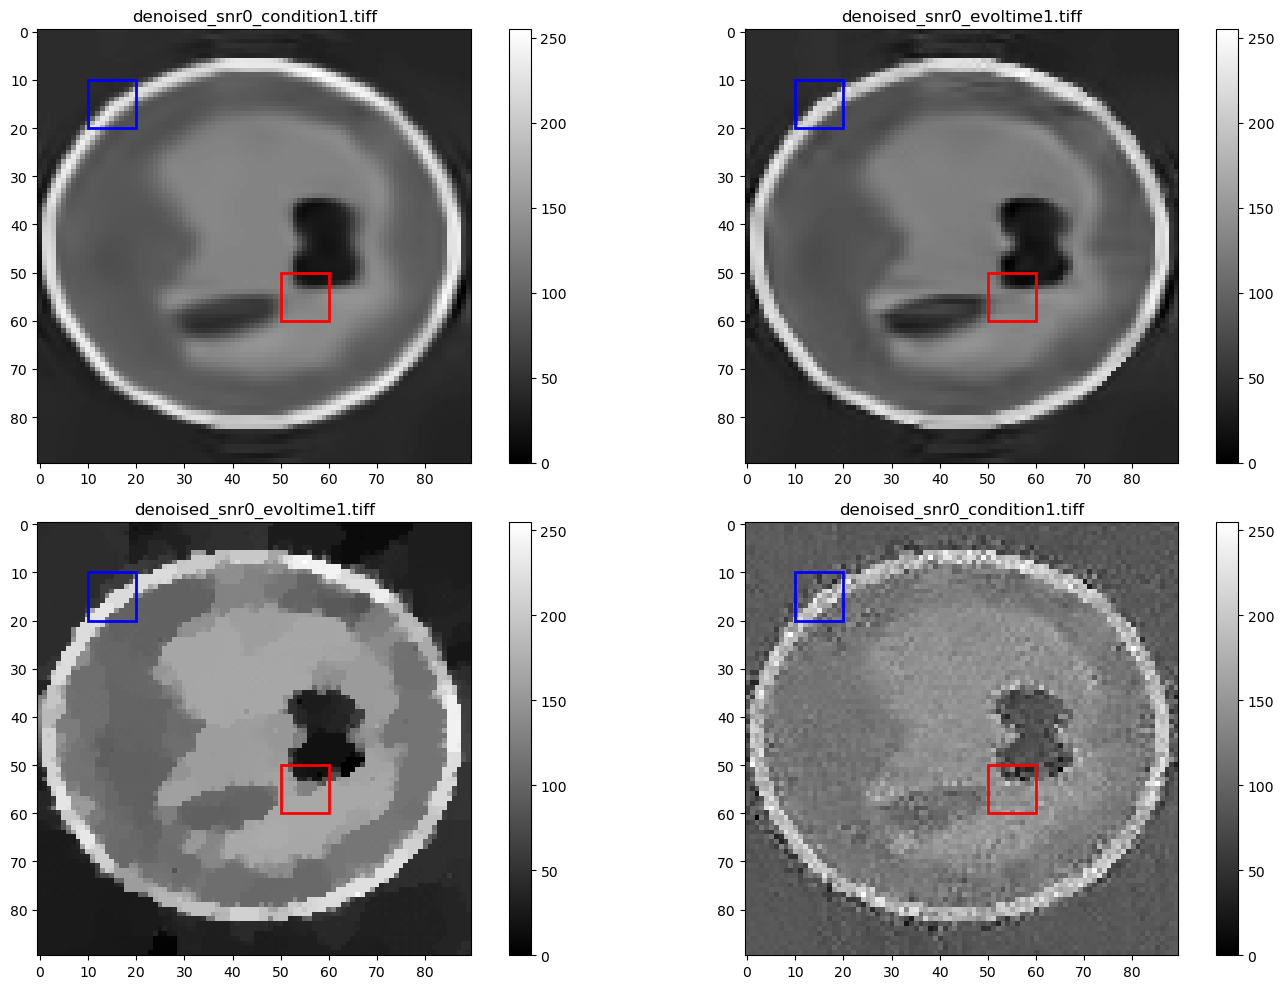

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords=None):
    """
    Calculate SNR and CNR for a given image.
    
    :param image_path: Path to the image file.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    :param roi2_coords: Coordinates for the second ROI for CNR calculation (optional).
    :return: SNR, CNR (CNR is None if roi2_coords is not provided).
    """
    image = imread(image_path)
    x, y, width, height = roi_coords
    roi_signal = image[y:y+height, x:x+width, :]
    mean_signal = np.mean(roi_signal)
    
    x, y, width, height = noise_coords
    roi_noise = image[y:y+height, x:x+width, :]
    std_noise = np.std(roi_noise)
    
    snr = mean_signal / std_noise if std_noise != 0 else np.inf
    
    cnr = None
    if roi2_coords:
        x, y, width, height = roi2_coords
        roi2_signal = image[y:y+height, x:x+width, :]
        mean_signal2 = np.mean(roi2_signal)
        cnr = (mean_signal - mean_signal2) / std_noise
    
    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords):
    """
    Visualize the ROIs on all images in a single figure.
    
    :param image_paths: List of paths to the image files.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    """
    num_images = len(image_paths)
    # Calculate the grid size for plotting
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows
    
    plt.figure(figsize=(15, nrows * 5))
    
    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)
        plt.imshow(image[:, :, 0], cmap='gray')  # Assuming we visualize the first channel
        plt.colorbar()
        
        # Draw the signal ROI
        x, y, width, height = roi_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='red', facecolor='none', linewidth=2))
        
        # Draw the noise ROI
        x, y, width, height = noise_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='blue', facecolor='none', linewidth=2))
        
        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

# Example usage
image_paths = [
    '../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/BM3D_Denoised_Rician/denoised_snr0_condition1.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/BM4D_Denoised_Rician/denoised_snr0_evoltime1.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/TV_Denoised_Rician/denoised_snr0_evoltime1.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/NLM_Denoised_Rician/denoised_snr0_condition1.tiff']
roi_coords = (50, 50, 10, 10)
noise_coords = (10, 10, 10, 10)
roi2_coords = (70, 70, 10, 10)  # Example secondary ROI for CNR calculation

for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")
    
    # Assuming image_paths, roi_coords, and noise_coords are already defined
visualize_all_rois(image_paths, roi_coords, noise_coords)

Image: ../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/BM3D_Denoised_Rician/denoised_snr5_condition1.tiff
SNR: 1.4078070001614635, CNR: 0.21269968461495325
Image: ../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/BM4D_Denoised_Rician/denoised_snr5_evoltime1.tiff
SNR: 1.4219952195712378, CNR: 0.1934958830196805
Image: ../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/TV_Denoised_Rician/denoised_snr5_evoltime1.tiff
SNR: 1.44459004841163, CNR: 0.33680028692257824
Image: ../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/NLM_Denoised_Rician/denoised_snr5_condition1.tiff
SNR: 1.7262589877804455, CNR: 0.22713699921679528


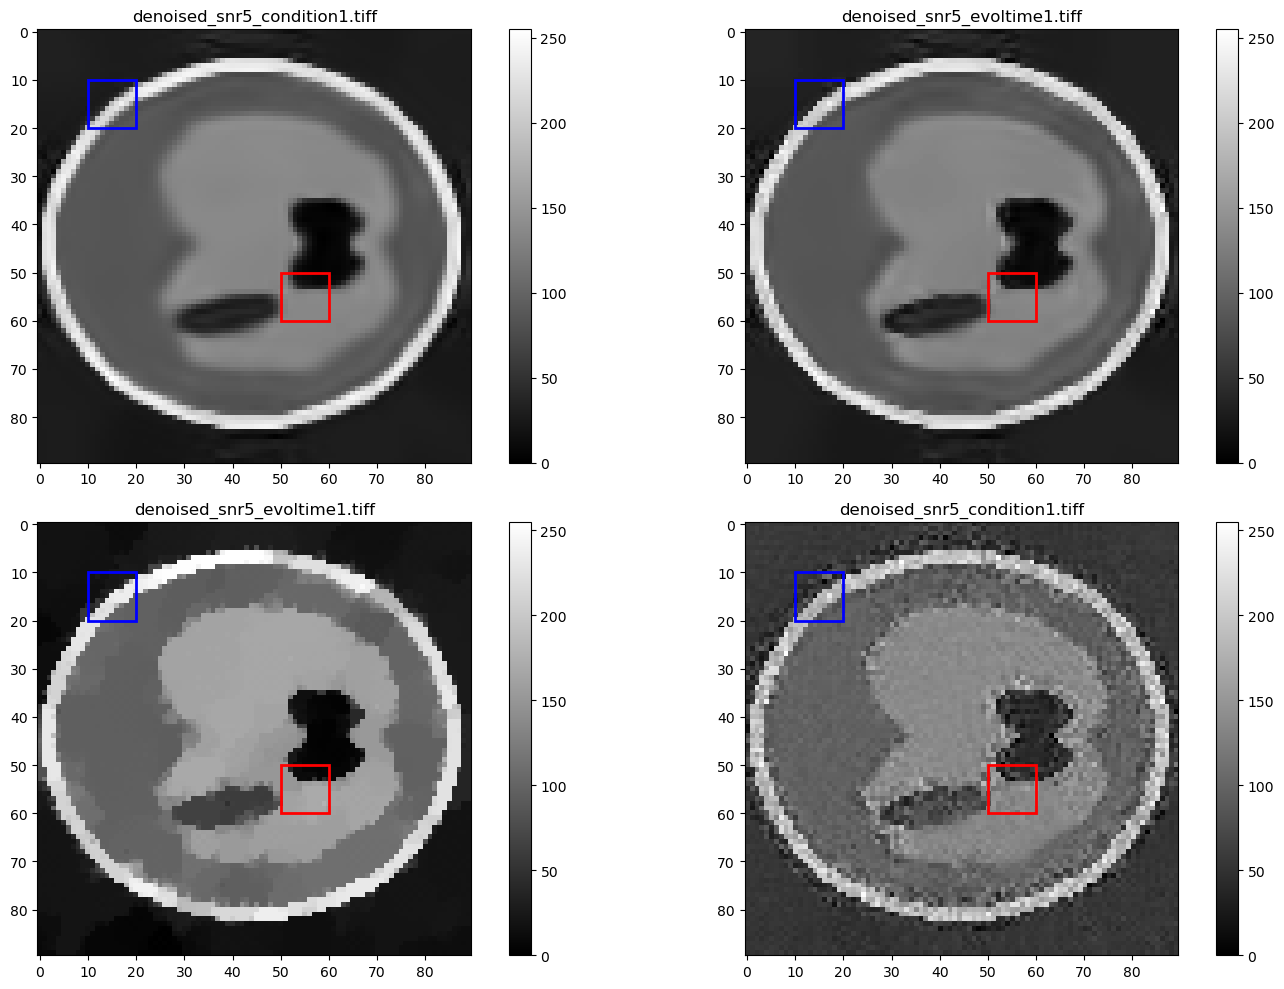

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords=None):
    """
    Calculate SNR and CNR for a given image.
    
    :param image_path: Path to the image file.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    :param roi2_coords: Coordinates for the second ROI for CNR calculation (optional).
    :return: SNR, CNR (CNR is None if roi2_coords is not provided).
    """
    image = imread(image_path)
    x, y, width, height = roi_coords
    roi_signal = image[y:y+height, x:x+width, :]
    mean_signal = np.mean(roi_signal)
    
    x, y, width, height = noise_coords
    roi_noise = image[y:y+height, x:x+width, :]
    std_noise = np.std(roi_noise)
    
    snr = mean_signal / std_noise if std_noise != 0 else np.inf
    
    cnr = None
    if roi2_coords:
        x, y, width, height = roi2_coords
        roi2_signal = image[y:y+height, x:x+width, :]
        mean_signal2 = np.mean(roi2_signal)
        cnr = (mean_signal - mean_signal2) / std_noise
    
    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords):
    """
    Visualize the ROIs on all images in a single figure.
    
    :param image_paths: List of paths to the image files.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    """
    num_images = len(image_paths)
    # Calculate the grid size for plotting
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows
    
    plt.figure(figsize=(15, nrows * 5))
    
    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)
        plt.imshow(image[:, :, 0], cmap='gray')  # Assuming we visualize the first channel
        plt.colorbar()
        
        # Draw the signal ROI
        x, y, width, height = roi_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='red', facecolor='none', linewidth=2))
        
        # Draw the noise ROI
        x, y, width, height = noise_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='blue', facecolor='none', linewidth=2))
        
        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

# Example usage
image_paths = [
    '../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/BM3D_Denoised_Rician/denoised_snr5_condition1.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/BM4D_Denoised_Rician/denoised_snr5_evoltime1.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/TV_Denoised_Rician/denoised_snr5_evoltime1.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/NLM_Denoised_Rician/denoised_snr5_condition1.tiff']
roi_coords = (50, 50, 10, 10)
noise_coords = (10, 10, 10, 10)
roi2_coords = (70, 70, 10, 10)  # Example secondary ROI for CNR calculation

for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")
    
    # Assuming image_paths, roi_coords, and noise_coords are already defined
visualize_all_rois(image_paths, roi_coords, noise_coords)

Image: ../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/BM3D_Denoised_Rician/denoised_snr10_condition1.tiff
SNR: 1.4652676202213395, CNR: 0.18927459890643067
Image: ../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/BM4D_Denoised_Rician/denoised_snr10_evoltime1.tiff
SNR: 1.4866626336470892, CNR: 0.1796919966344002
Image: ../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/TV_Denoised_Rician/denoised_snr10_evoltime1.tiff
SNR: 1.4075801684918685, CNR: 0.2884251859642159
Image: ../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/NLM_Denoised_Rician/denoised_snr10_condition1.tiff
SNR: 1.6608115520363176, CNR: 0.23329489952135435


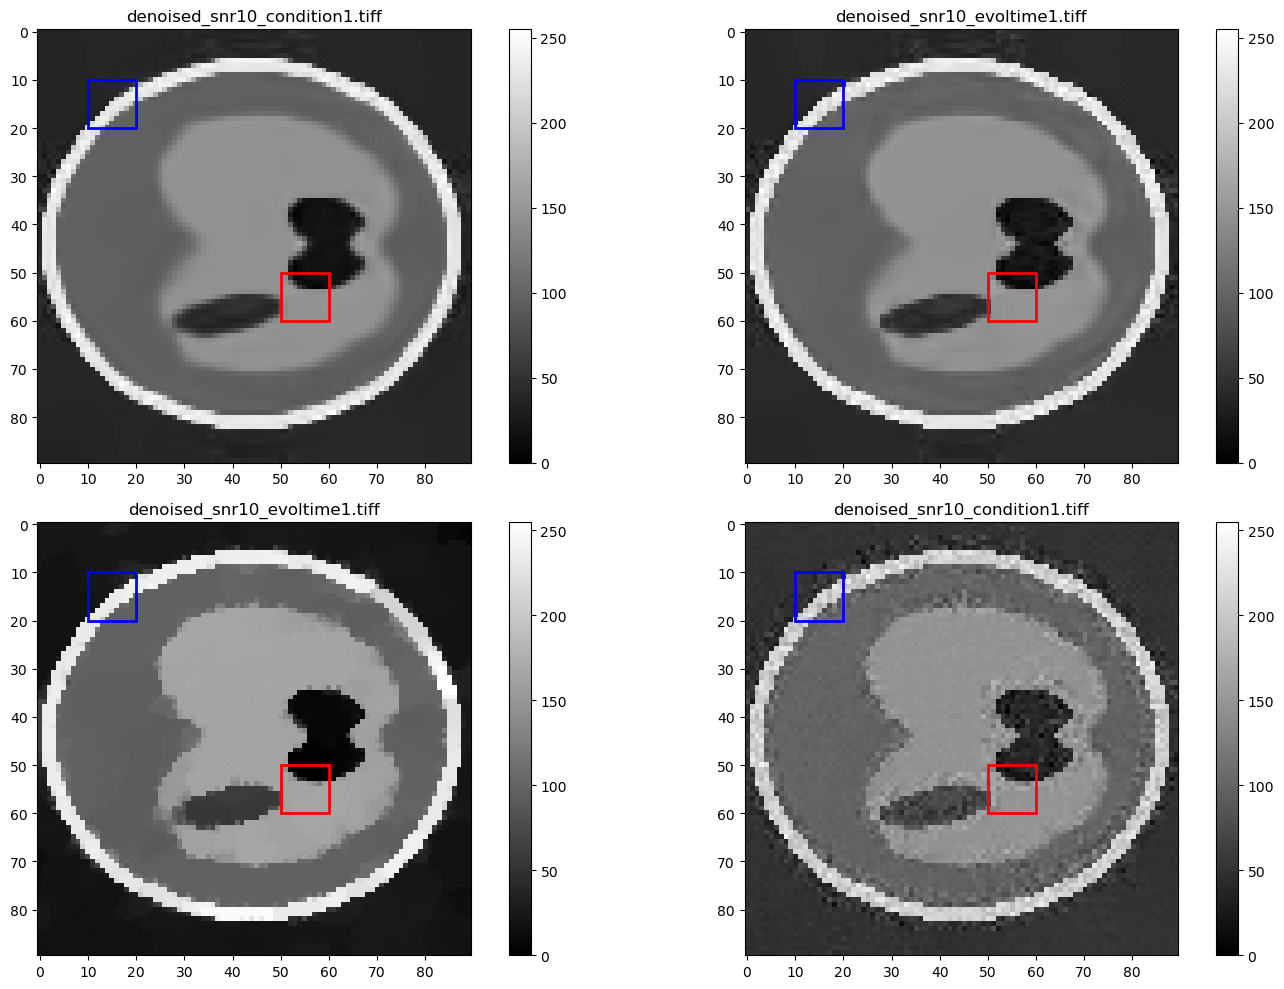

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords=None):
    """
    Calculate SNR and CNR for a given image.
    
    :param image_path: Path to the image file.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    :param roi2_coords: Coordinates for the second ROI for CNR calculation (optional).
    :return: SNR, CNR (CNR is None if roi2_coords is not provided).
    """
    image = imread(image_path)
    x, y, width, height = roi_coords
    roi_signal = image[y:y+height, x:x+width, :]
    mean_signal = np.mean(roi_signal)
    
    x, y, width, height = noise_coords
    roi_noise = image[y:y+height, x:x+width, :]
    std_noise = np.std(roi_noise)
    
    snr = mean_signal / std_noise if std_noise != 0 else np.inf
    
    cnr = None
    if roi2_coords:
        x, y, width, height = roi2_coords
        roi2_signal = image[y:y+height, x:x+width, :]
        mean_signal2 = np.mean(roi2_signal)
        cnr = (mean_signal - mean_signal2) / std_noise
    
    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords):
    """
    Visualize the ROIs on all images in a single figure.
    
    :param image_paths: List of paths to the image files.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    """
    num_images = len(image_paths)
    # Calculate the grid size for plotting
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows
    
    plt.figure(figsize=(15, nrows * 5))
    
    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)
        plt.imshow(image[:, :, 0], cmap='gray')  # Assuming we visualize the first channel
        plt.colorbar()
        
        # Draw the signal ROI
        x, y, width, height = roi_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='red', facecolor='none', linewidth=2))
        
        # Draw the noise ROI
        x, y, width, height = noise_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='blue', facecolor='none', linewidth=2))
        
        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

# Example usage
image_paths = [
    '../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/BM3D_Denoised_Rician/denoised_snr10_condition1.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/BM4D_Denoised_Rician/denoised_snr10_evoltime1.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/TV_Denoised_Rician/denoised_snr10_evoltime1.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/NLM_Denoised_Rician/denoised_snr10_condition1.tiff']
roi_coords = (50, 50, 10, 10)
noise_coords = (10, 10, 10, 10)
roi2_coords = (70, 70, 10, 10)  # Example secondary ROI for CNR calculation

for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")
    
    # Assuming image_paths, roi_coords, and noise_coords are already defined
visualize_all_rois(image_paths, roi_coords, noise_coords)